In [149]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as  plt



In [150]:
#encodings = ["utf-8","utf-8-sig", "iso-8859-1", "latin1", "cp1252","Windows-1252"]
#for en in encodings:
 #   try:
  #      df = pd.read_csv('file.csv',encoding=en)
   #     break
    #except Exception as e:  # or the error you receive
     #   print(en)
df=pd.read_csv(r'C:\Users\HP\PycharmProjects\spamcheckerwithflask\spam.csv', encoding="Windows-1252")
df.shape
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5217,ham,Well thats nice. Too bad i cant eat it,NaN,NaN,NaN
880,spam,Reminder: You have not downloaded the content ...,NaN,NaN,NaN
2253,ham,Lol enjoy role playing much?,NaN,NaN,NaN


##1.DATA cleaning
##2.EDA
##3.TEXT preprocessing
##4.Model building
##5.Evaluation
##6.Improvement
##7.Website
##8.Deploy




In [151]:
#(1)data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [152]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4838,ham,That's one of the issues but california is oka...,NaN,NaN,NaN
1833,ham,When should I come over?,NaN,NaN,NaN
247,ham,Kallis wont bat in 2nd innings.,NaN,NaN,NaN
3427,ham,\Hi darlin did youPhone me? Im atHome if youwa...,NaN,NaN,NaN


In [153]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
756,ham,Cant think of anyone with * spare room off * t...,NaN,NaN,NaN
649,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",NaN,NaN,NaN
3635,ham,\ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOU...,NaN,NaN,NaN
1533,ham,Horrible bf... I now v hungry...,NaN,NaN,NaN
3801,ham,No da. I am happy that we sit together na,NaN,NaN,NaN


In [154]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])


df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [155]:
# missing values
df.isnull().sum()


target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [156]:
# check for duplicate values
df.duplicated().sum()

403

In [157]:
#drop duplicates

In [158]:
df = df.drop_duplicates(keep='first')

In [159]:
df.shape

(5169, 5)

#2.EDA

In [160]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [161]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

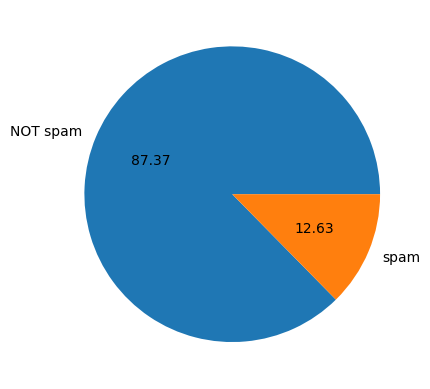

In [162]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['NOT spam','spam'],autopct="%0.2f")
plt.show()

In [163]:
import nltk


In [164]:
print(nltk.__version__)

3.8.1


In [165]:
df['num_char']=df['text'].apply(len)

In [166]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [167]:
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [168]:
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char
3505,0,Nite...,NaN,NaN,NaN,7
2674,0,I am 6 ft. We will be a good combination!,NaN,NaN,NaN,41
1238,0,"Dear relieved of westonzoyland, all going to p...",NaN,NaN,NaN,63
1423,0,Lol great now im getting hungry.,NaN,NaN,NaN,32
3113,0,Yes watching footie but worried we're going to...,NaN,NaN,NaN,70


In [169]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [170]:
df[['num_char','num_word','num_sentences']].describe()


,num_char,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [171]:
# not spam
df[df['target'] == 0][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [172]:
# spam
df[df['target'] == 1][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Axes: xlabel='num_char', ylabel='Count'>

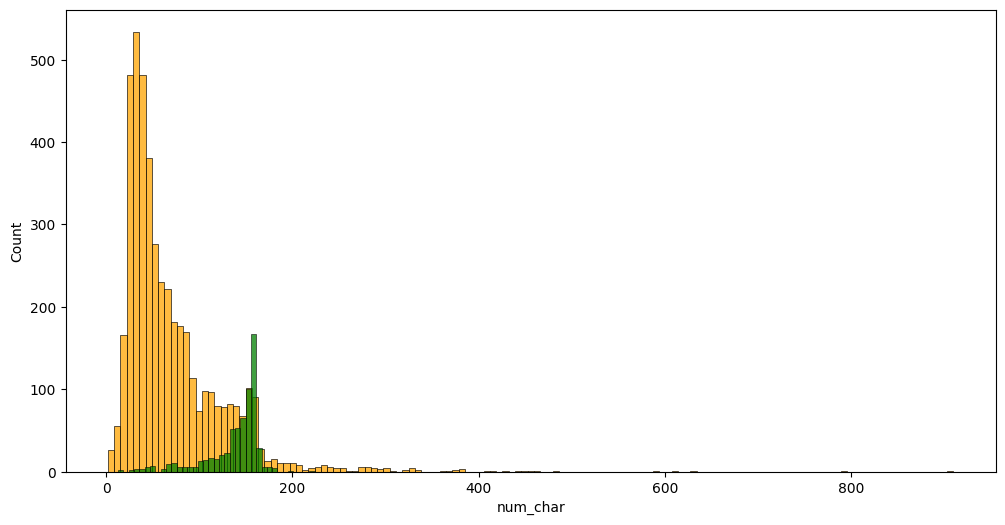

In [173]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'],color='orange')
sns.histplot(df[df['target'] == 1]['num_char'],color='green')

C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Axes: xlabel='num_word', ylabel='Count'>

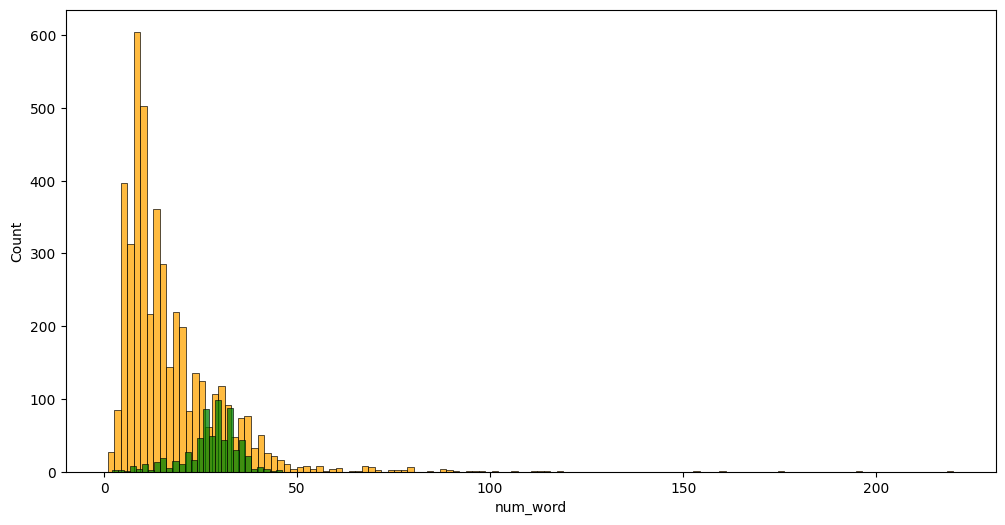

In [174]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'],color='orange')
sns.histplot(df[df['target'] == 1]['num_word'],color='green')

C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

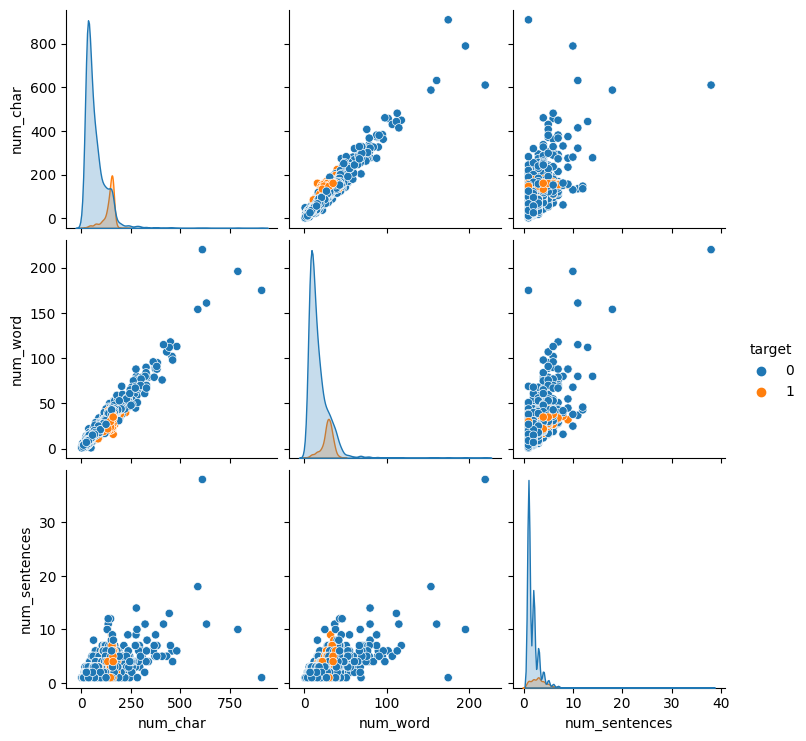

In [175]:
sns.pairplot(df,hue='target')

3.Data Preprocessing

 i)Lowercase

 ii)tokenization

 iii)removing stop word and punctuation

 iv)removing special charcaters

 v)Stemming




In [176]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
print(ps.stem('dirty'))
print(ps.stem('courageous'))

dirti
courag


In [177]:
import string
from nltk.corpus import stopwords

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

    text=y[:]
    y.clear()


    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    text=y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)

In [178]:
transform_text("text hello ?????? my name is Aditya NEgi.")

'text hello name aditya negi'

In [179]:
df['transformed_text'] = df['text'].apply(transform_text)

In [180]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


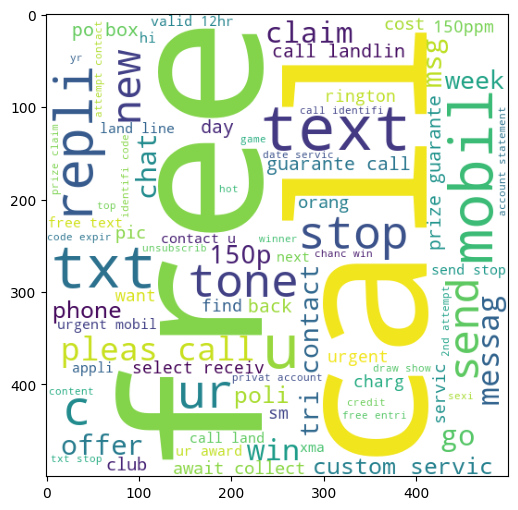

In [182]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

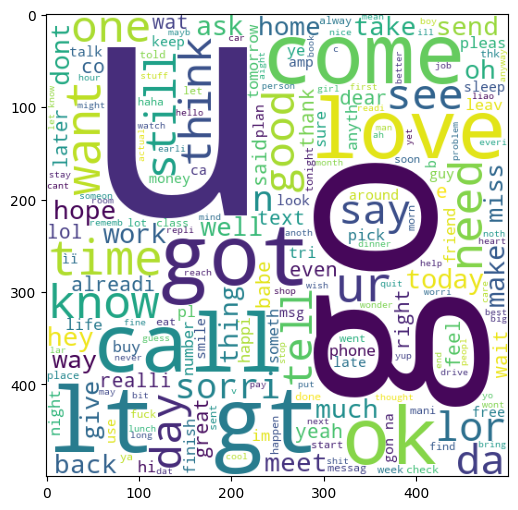

In [183]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [184]:
not_spam=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    not_spam.append(word)
len(not_spam)

9939

C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


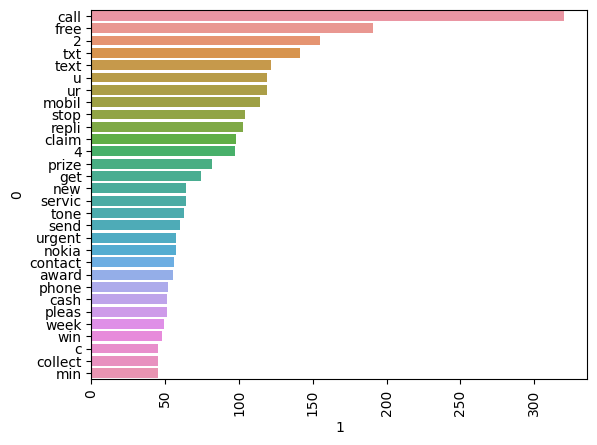

In [185]:
from collections import Counter
data=pd.DataFrame(Counter(not_spam).most_common(30))
sns.barplot(x=data[1],
            y=data[0])
plt.xticks(rotation='vertical')
plt.show()

In [186]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_char,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


#4.Model Building

In [195]:
import sklearn.feature_extraction.text
dir(sklearn.feature_extraction)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

x=tfid.fit_transform(df['transformed_text']).toarray()

In [196]:
x.shape

(5169, 3000)

In [197]:
y=df['target'].values

In [198]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [199]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gn=GaussianNB()
mn=MultinomialNB()
bn=BernoulliNB()

In [200]:
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion:",confusion_matrix(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))

accuracy: 0.8694390715667312
confusion: [[788 108]
 [ 27 111]]
precision: 0.5068493150684932


In [201]:
mn.fit(x_train,y_train)
y_pred=mn.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion:",confusion_matrix(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))

accuracy: 0.9709864603481625
confusion: [[896   0]
 [ 30 108]]
precision: 1.0


In [202]:
bn.fit(x_train,y_train)
y_pred=bn.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion:",confusion_matrix(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))

accuracy: 0.9835589941972921
confusion: [[895   1]
 [ 16 122]]
precision: 0.991869918699187


#tfidf-->MNB

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [204]:
sv=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
#dtc=DecisionTreeClassifier(max_depth=5)
#lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
#abc=AdaBoostClassifier(n_estimators=50, random_state=2)
#bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
#gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb=XGBClassifier(n_estimators=50,random_state=2)

In [205]:
clfs = {
     'SVC':sv,
       'NB':mnb,
      # 'DT': dtc,
       # 'LR': lrc,
         'RF': rfc,
        #  'AdaBoost': abc,
           #'BgC': bc,
             'KNC': knc,
             'ETC': etc
            #  'GBDT':gbdt,
             #  'xgb':xgb

    }

In [206]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    return acc, prec

In [207]:
%%time

acc_score=[]
pre_score=[]
for name,clf in clfs.items():
    cur_acc,cur_pre=train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For -->",name)
    print("Accuracy -->",cur_acc)
    print("Precision -->",cur_pre)

    acc_score.append(cur_acc)
    pre_score.append(cur_pre)

For --> SVC
Accuracy --> 0.9758220502901354
Precision --> 0.9747899159663865
For --> NB
Accuracy --> 0.9709864603481625
Precision --> 1.0
For --> RF
Accuracy --> 0.9758220502901354
Precision --> 0.9829059829059829
For --> KNC
Accuracy --> 0.9052224371373307
Precision --> 1.0
For --> ETC
Accuracy --> 0.9748549323017408
Precision --> 0.9745762711864406
CPU times: total: 33.5 s
Wall time: 40.5 s


In [208]:
result_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_score,'Precision':pre_score})
result_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,NB,0.970986,1.000000
2,RF,0.975822,0.982906
3,KNC,0.905222,1.000000
4,ETC,0.974855,0.974576


In [209]:
result_df1=pd.melt(result_df,id_vars='Algorithm')
result_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,KNC,Accuracy,0.905222
4,ETC,Accuracy,0.974855
5,SVC,Precision,0.974790
6,NB,Precision,1.000000
7,RF,Precision,0.982906
8,KNC,Precision,1.000000
9,ETC,Precision,0.974576


C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\PycharmProjects\spamcheckerwithflask\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

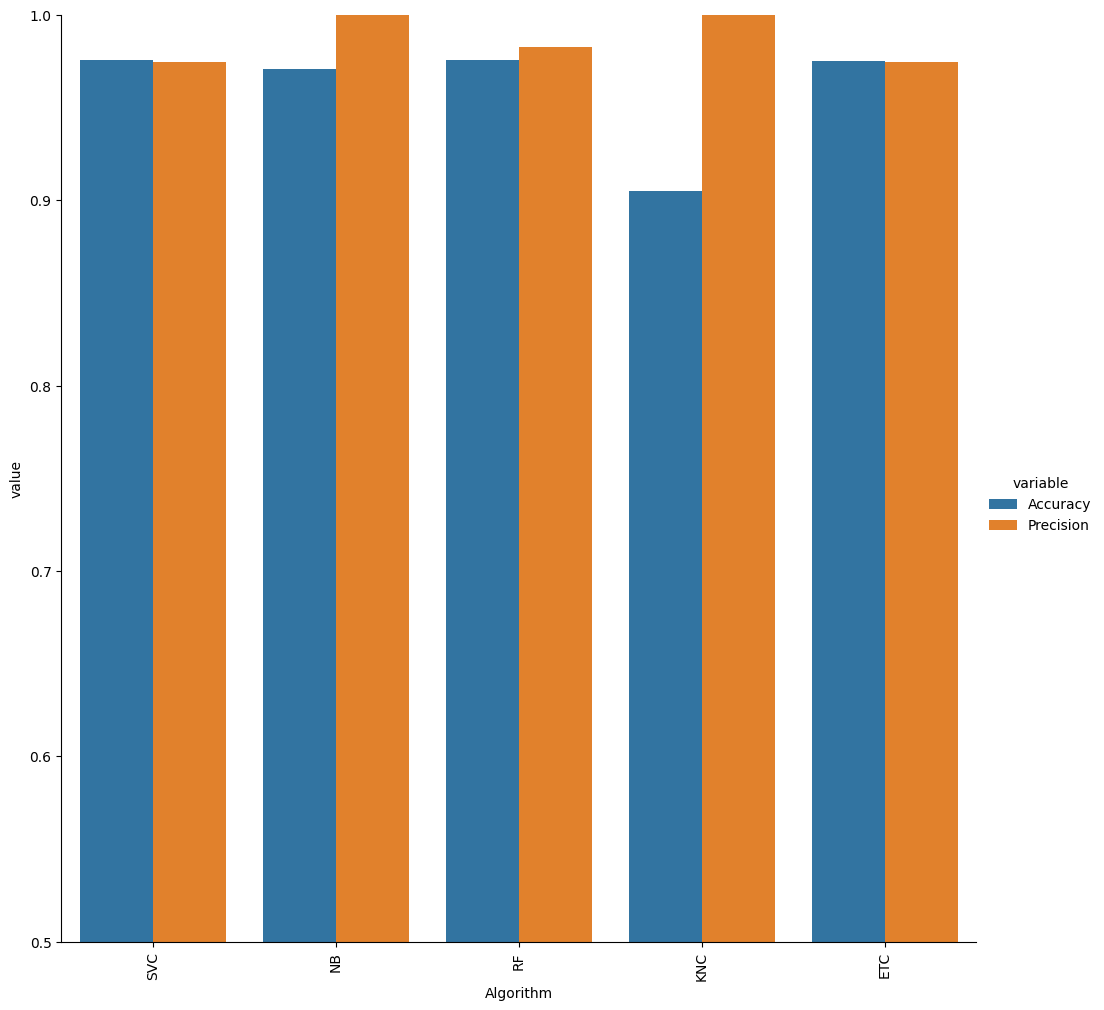

In [210]:
sns.catplot(x='Algorithm',
            y='value',
            hue='variable',
            data=result_df1,
            kind='bar',
            height=10)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#Model improvement


#Change max_features parameter of Tfidf

In [211]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':acc_score,'Precision_scaling':pre_score}).sort_values('Precision_scaling',ascending=False)

In [212]:
new_df=result_df.merge(temp_df,on='Algorithm')

In [213]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [214]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,KNC,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576


In [215]:
#voting Classifier
sv=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mn=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [216]:
voting = VotingClassifier(estimators=[('sv', sv),
                                      ('mn', mn),
                                      ('et', etc),
                                      ('rfc',rfc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('sv',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mn', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [217]:
y_pred=voting.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9796905222437138
Precision: 0.9915966386554622


###Applying stacking

In [218]:
estimators=[('svm',sv),('mnb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [219]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [220]:
%%time
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428
CPU times: total: 3min 32s
Wall time: 4min 19s


In [222]:
import pickle
pickle.dump(tfid, open('vectorized.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))